# Pytorch

In [3]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [187]:
data = pd.read_csv("D:/KULIAH/Sem 7/AI/Tugas Pytorch/Salary_Data.csv")
data

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [188]:
# Memastikan tidak ada data yang berisi null
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

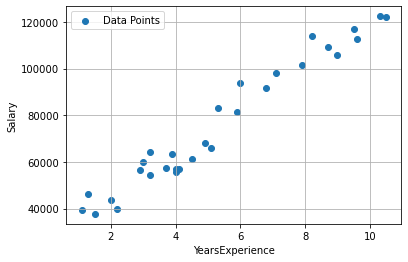

In [189]:
X = data['YearsExperience'].tolist()
Y = data['Salary'].tolist()

plt.scatter(X, Y, label='Data Points')
plt.grid()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [190]:
# n = data.shape[0]
# X = np.ones((n, 2)) # dtype='int64')
# X[:,0] = data['YearsExperience'].values
# X[:,1] = data['Age'].values

X_train = data['YearsExperience'].values
Y_train = data['Salary'].values

## Model

In [191]:
class LR(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, X):
        pred = self.linear(X)
        return pred

    model = LR(1, 1)  # jumlah input features dan output features
print(list(model.parameters()))

# model = nn.Linear(2, 1)
# print(model.weight)
# print(model.bias)

[Parameter containing:
tensor([[9501.0146]], requires_grad=True), Parameter containing:
tensor([25448.1738], requires_grad=True)]


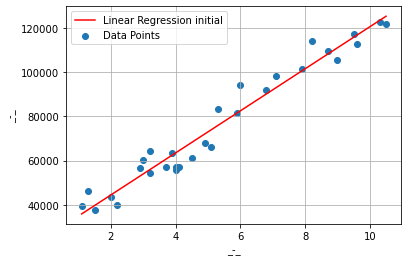

In [194]:
def get_params():
    return w[0][0].item(), b[0].item() # mengubah menjadi skalar

[w, b] = model.parameters()
w, b = get_params()
# x1 = np.linspace (np.min(X_train), np.max(X_train))
x1 = np.array(X_train)
# w = 0.83245
# b = 0.12345
y1 = w*x1 + b

plt.plot(x1, y1, color='red',label='Linear Regression initial') #plotting
plt.scatter(X_train, Y_train, label='Data Points')
plt.grid()
plt.xlabel("_-_")
plt.ylabel("_-_")
plt.legend()
plt.show()

In [195]:
criterion = nn.MSELoss() # mean squared error loss function
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01) # SGD = Stochastic gradient descent, lr = learning rate

In [196]:
# X_tensor = X_tensor.view(-1,1)
# X_tensor
# y_train = torch.from_numpy(Y_train)
X_train = np.array(X_train, dtype='float32')
Y_train = np.array(Y_train, dtype='float32')


# X_tensor = torch.from_numpy(X_train)
# y_train = torch.from_numpy(Y_train)
# X_tensor.view(-1,1)

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)


In [197]:
loss_record =[]
epochs = 1000

for epochs_num in range (epochs):
    X = torch.from_numpy(X_train).requires_grad_()
    y = torch.from_numpy(Y_train)
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print(f"Epochs : {epochs_num}, Loss : {loss}")
    loss_record.append(loss)   # simpan nilai loss
    optimizer.zero_grad() # sets gradients ke nol 
    loss.backward()       # back propagation (menghitung gradien dari func loss)
    optimizer.step()      # update parameter

Epochs : 0, Loss : 31296544.0
Epochs : 1, Loss : 31296324.0
Epochs : 2, Loss : 31296114.0
Epochs : 3, Loss : 31295902.0
Epochs : 4, Loss : 31295684.0
Epochs : 5, Loss : 31295484.0
Epochs : 6, Loss : 31295274.0
Epochs : 7, Loss : 31295062.0
Epochs : 8, Loss : 31294856.0
Epochs : 9, Loss : 31294656.0
Epochs : 10, Loss : 31294460.0
Epochs : 11, Loss : 31294260.0
Epochs : 12, Loss : 31294058.0
Epochs : 13, Loss : 31293868.0
Epochs : 14, Loss : 31293684.0
Epochs : 15, Loss : 31293486.0
Epochs : 16, Loss : 31293292.0
Epochs : 17, Loss : 31293110.0
Epochs : 18, Loss : 31292910.0
Epochs : 19, Loss : 31292726.0
Epochs : 20, Loss : 31292546.0
Epochs : 21, Loss : 31292360.0
Epochs : 22, Loss : 31292188.0
Epochs : 23, Loss : 31292014.0
Epochs : 24, Loss : 31291832.0
Epochs : 25, Loss : 31291652.0
Epochs : 26, Loss : 31291478.0
Epochs : 27, Loss : 31291290.0
Epochs : 28, Loss : 31291132.0
Epochs : 29, Loss : 31290968.0
Epochs : 30, Loss : 31290798.0
Epochs : 31, Loss : 31290624.0
Epochs : 32, Loss 

In [198]:
def plot_modul(judul):
    plt.title = judul
    w, b = get_params()
    X1 = np.linspace (np.min(X_train), np.max(X_train))
    Y1 = w*X1 + b
    plt.plot(X1, Y1, 'r')
    plt.scatter(X_train, Y_train)

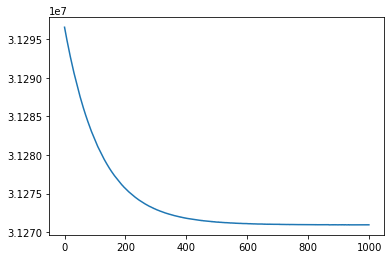

In [199]:
%matplotlib inline
loss_record = [ loss.detach().numpy() for loss in loss_record]
plt.plot(loss_record)

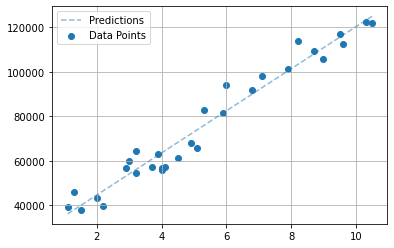

In [200]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()

# Plot true data
# plt.scatter(X_train, Y_train, 'go', label='True data', alpha=0.5)
plt.scatter(X_train, Y_train, label='Data Points')
# Plot predictions
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.grid()
plt.legend(loc='best')
plt.show()

In [201]:
y


tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
        [112635.],
        [122391.],
        [121872.]])

In [202]:
predicted

array([[ 36183.008],
       [ 38073.145],
       [ 39963.285],
       [ 44688.633],
       [ 46578.773],
       [ 53194.266],
       [ 54139.336],
       [ 56029.477],
       [ 56029.477],
       [ 60754.82 ],
       [ 62644.96 ],
       [ 63590.03 ],
       [ 63590.03 ],
       [ 64535.1  ],
       [ 68315.38 ],
       [ 72095.664],
       [ 73985.805],
       [ 75875.945],
       [ 81546.36 ],
       [ 82491.43 ],
       [ 90051.99 ],
       [ 92887.195],
       [100447.76 ],
       [103282.97 ],
       [108008.31 ],
       [110843.53 ],
       [115568.875],
       [116513.95 ],
       [123129.44 ],
       [125019.58 ]], dtype=float32)

In [203]:
def accuracy(t,y):
    # t is the target (actual)
    # y is the prediction
    y = (y>0.5).astype(int)
    return (t==y).mean()

In [205]:
from sklearn.metrics import r2_score
test_accuracy=r2_score(y.numpy(), predicted)
print(test_accuracy)

0.9569566561971652
